<a href="https://colab.research.google.com/github/3152251/viola-jones-face-detection-by-nugroho-15.11.9322/blob/main/deteksi_wajah_viola_jones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cascade Classification Viola Jones

Salah satu hal utama yang dapat kita lakukan dengan penglihatan adalah pendeteksian objek.

Deteksi Objek menggunakan pengklasifikasi kaskade berbasis fitur Haar adalah metode deteksi objek efektif yang diusulkan oleh Paul Viola dan Michael Jones dalam makalahnya [ini](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) dan di kembangkan kemudian oleh [Rainer Lienhart](http://wiki.opencv.org.cn/images/5/52/MRL-TR-May02-revised-Dec02.pdf).

Ini adalah pendekatan berbasis pembelajaran mesin di mana fungsi kaskade dilatih dari banyak citra positif dan negatif. Hal ini kemudian digunakan untuk mendeteksi objek dalam gambar lain.

OpenCV menyediakan metode pelatihan ( lihat [Cascade Classifier Training](https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html)) atau model terlatih, yang dapat dibaca menggunakan metode cv2.CascadeClassifierload. Model pra-*terlatih* terletak di folder data dalam instalasi OpenCV atau dapat ditemukan [di sini](https://github.com/opencv/opencv/tree/3.4/data).

Dalam catatan ini kita akan mencoba dengan beberapa model haarcascades yang disediakan. Lebih lanjut tentang topik ini dapat ditemukan [di sini](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html).

In [2]:
import cv2 
import common
import numpy as np

%matplotlib inline 
from matplotlib import pyplot as plt # ini memungkinkan kita menggambar gambar sebaris di notebook
import pylab # ini memungkinkan kita untuk mengontrol ukuran gambar
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # mengontrol ukuran gambar di notebook

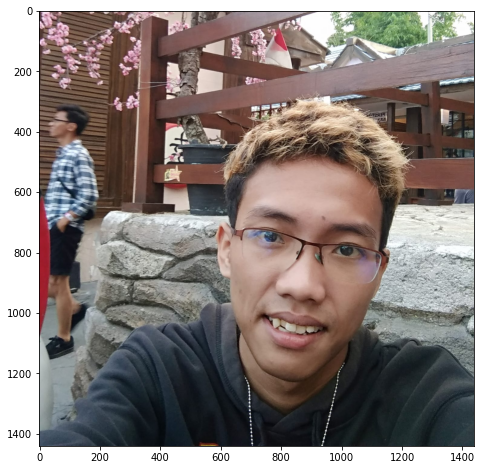

In [3]:
# Load the test image and create a greyscale copy of it to be used in the classifiers

base_image = cv2.imread('nugroho.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))

# Face Detection

Kita akan menggunakan model haarcascade_frontalface_default.xml untuk mendeteksi wajah di foto. Anda dapat menemukan detail lebih lanjut tentang parameter fungsi detectMultiScale [di sini](https://docs.opencv.org/3.4/d1/de5/classcv_1_1CascadeClassifier.html#aaf8181cb63968136476ec4204ffca498).

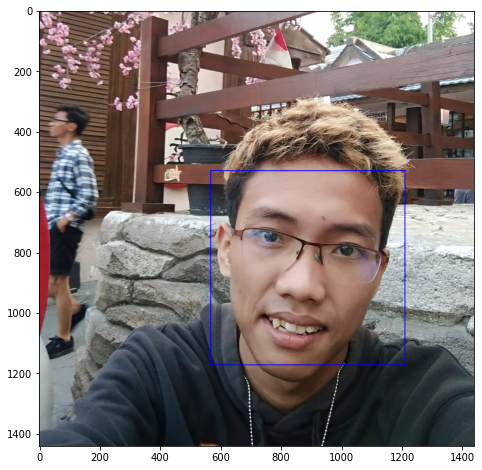

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('nugroho.jpg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Smile Detection
kita akan menggunakan model pra-terlatih haarcascade_smile.xml untuk mendeteksi senyuman pada gambar.

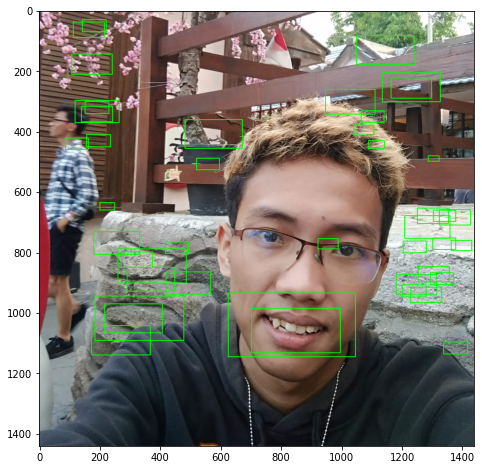

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('nugroho.jpg')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)
for (x,y,w,h) in smiles:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

Seperti yang dilihat, itu mendeteksi senyuman dengan benar (orang yang tepat, yang sebenarnya adalah saya, tidak memberikan senyuman penuh) tetapi ada banyak kesalahan, yang biasa terjadi dalam model kaskade. Oleh karena itu, untuk memperbaikinya, kita hanya akan mempertimbangkan senyuman yang terdeteksi di dalam wajah yang terdeteksi sebelumnya.

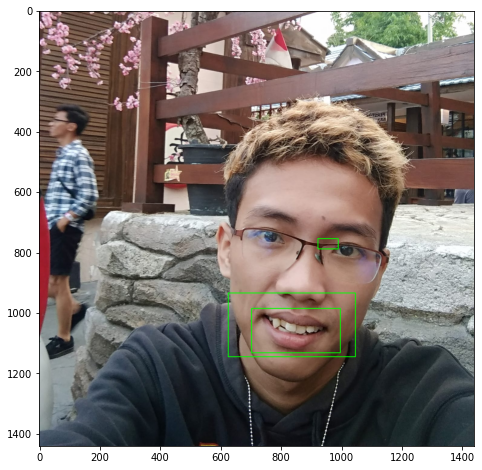

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('nugroho.jpg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

# Eye Detection

Menggunakan model haarcascade_frontalface_default.xml untuk mendeteksi wajah pada gambar.

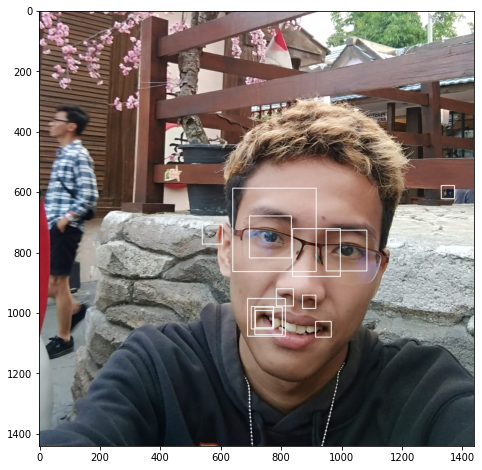

In [ ]:
test_image = cv2.imread('nugroho.jpg')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(grey, 1.3, 1)
for (x,y,w,h) in eyes:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

Mirip dengan apa yang terjadi pada senyuman, ada beberapa deteksi palsu, dan dalam kasus khusus ini negatif palsu (kesalahan pengklasifikasi). Jadi kita akan menggunakan pendekatan yang sama untuk menyaring mata yang dikenali yang ada di dalam wajah.

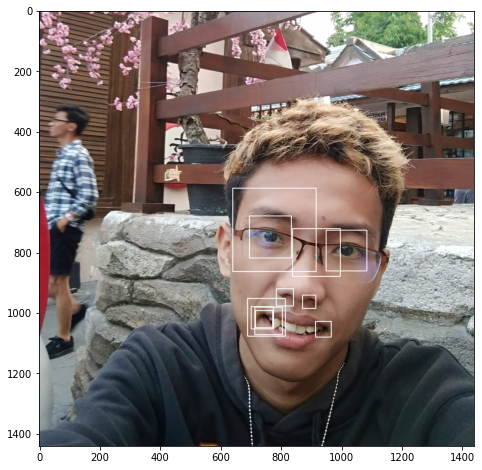

In [ ]:
test_image = cv2.imread('nugroho.jpg')
for (x,y,w,h) in faces:
  #cv2.rectangle(smile_faces_base_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

## menggabungkan semua deteksi (wajah, senyum dan mata)



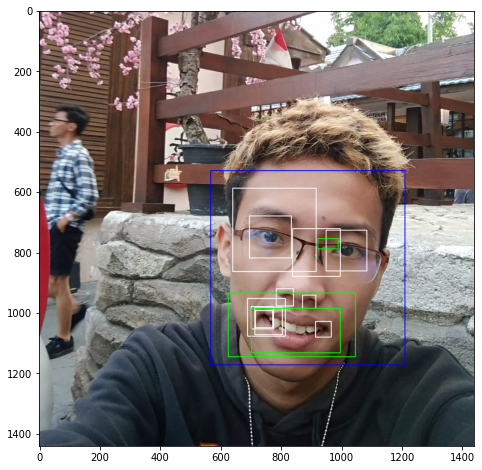

In [ ]:
test_image = cv2.imread('nugroho.jpg')
for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))